In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
#ROC_AUC only handles binary 0,1 values. Using LabelBinarizer to convert y_test and y_pred
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
# http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
# Data from the website needs lot of rework and cleansing before uploading. I used excel to make the data as you see it.
df=pd.read_csv('auto_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

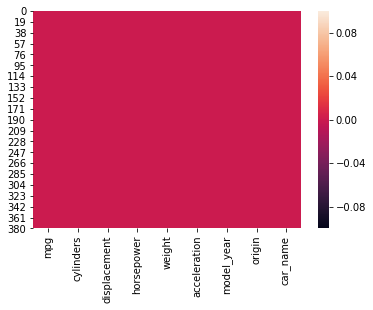

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### mpg #######
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
####### cylinders #######
[8 4 6 3 5]
####### displacement #######
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64
####### horsepower #######
count     398
unique     94
top       150
freq       22
Name: horsepower, dtype: object
####### weight #######
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64
####### acceleration #######
count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: ac

Observations:
1. Horsepower is supposed to be number, but shows as object. Might have missing values here.
2. Doesn't seem to have any null values in the dataset.
3. Car name needs to be analysed and look for possible data extraction.

In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


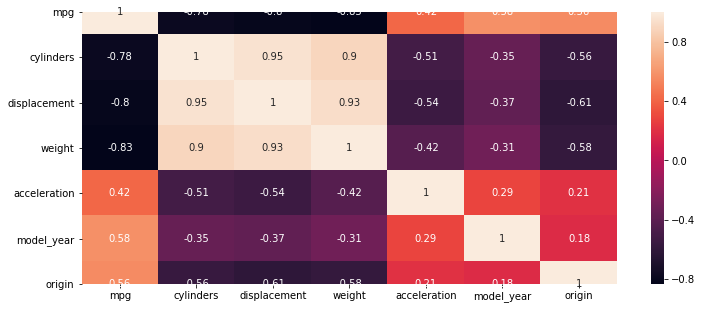

In [9]:
# Data Visulaization
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)

Observations:
1. cylinders, displacement and weight is highly and positively correlated.
2. Least correlation between origin and 'model year'.

Skewness of cylinders = 0.53
Skewness of displacement = 0.72
Skewness of weight = 0.53


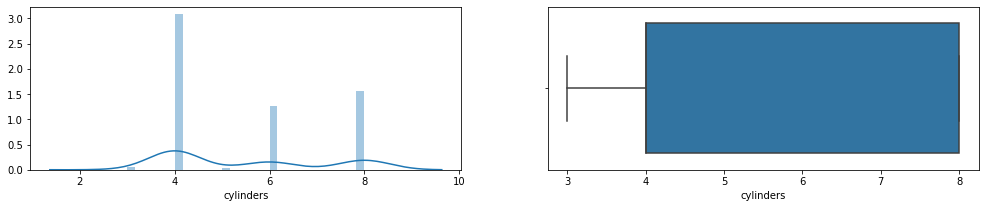

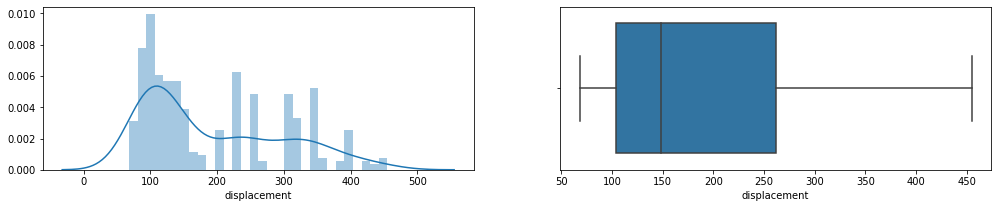

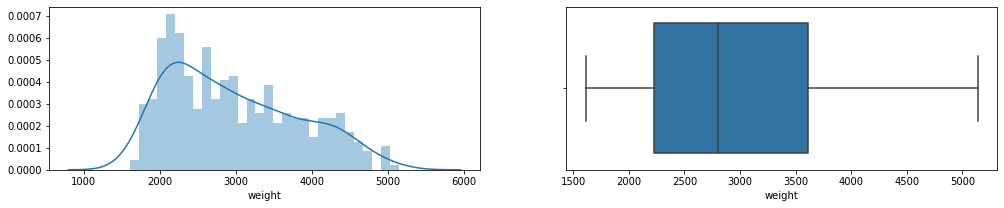

In [10]:
#Univariate analysis 'cylinders', 'displacement' and 'weight'
for i in ['cylinders', 'displacement', 'weight']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

Observations:
1. No outliers.
2. displacement and weight is skewed to the right.
3. Will apply log10 to rectify skewness after analysis.

In [11]:
df['horsepower'].replace('?',0, inplace=True)
df['horsepower'] = df['horsepower'].astype(int)

a=int(df['horsepower'].mean())
print('Mean of Horsepower = %0.2f' %(a))
df['horsepower'].replace(0, a, inplace=True)
df.horsepower.unique()

Mean of Horsepower = 102.00


array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 102, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

Skewness of horsepower = 1.10


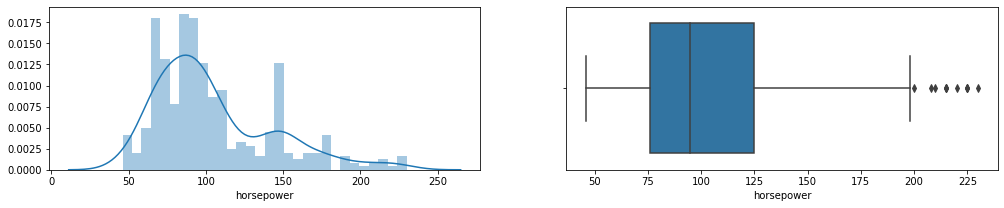

In [12]:
#Univariate analysis 'horsepower'
f=plt.figure(figsize=(17,3))
f.add_subplot(1,2,1)
sns.distplot(df['horsepower'],bins=30)
f.add_subplot(1,2,2)
sns.boxplot(df['horsepower'])
print('Skewness of %s = %0.2f' %('horsepower', df['horsepower'].skew()))

Observations:
1. Few outliers found post 200 HP.
2. Heavily skewed to the right.

Skewness of acceleration = 0.28


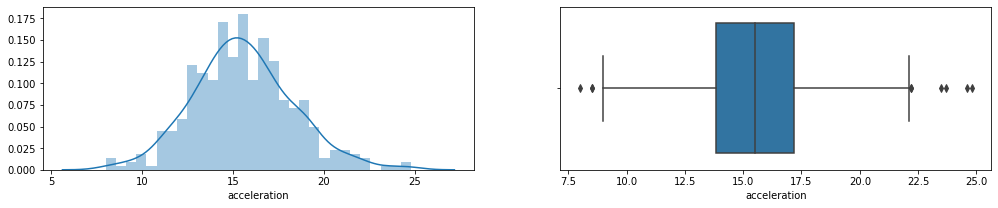

In [13]:
#Univariate analysis 'acceleration'
f=plt.figure(figsize=(17,3))
f.add_subplot(1,2,1)
sns.distplot(df['acceleration'],bins=30)
f.add_subplot(1,2,2)
sns.boxplot(df['acceleration'])
print('Skewness of %s = %0.2f' %('acceleration', df['acceleration'].skew()))

acceleration has outliers, but is normally distributed.

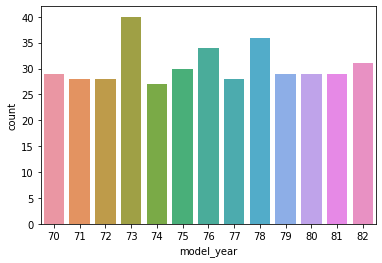

In [14]:
#Univariate analysis 'model_year'
sns.countplot(df['model_year'])

Observations:
1. 40 cars in the dataset is manufactured in 1973.
2. The least were manufactured in 1974.

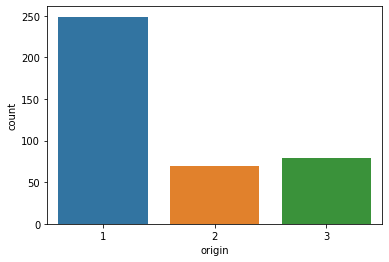

In [15]:
#Univariate analysis 'orgin'
sns.countplot(df['origin'])

1. 250 cars were from America
2. 25% of the cars originated from Europe
3. 25% of the cars were from Asia and other parts of the world

Skewness of mpg = 0.46


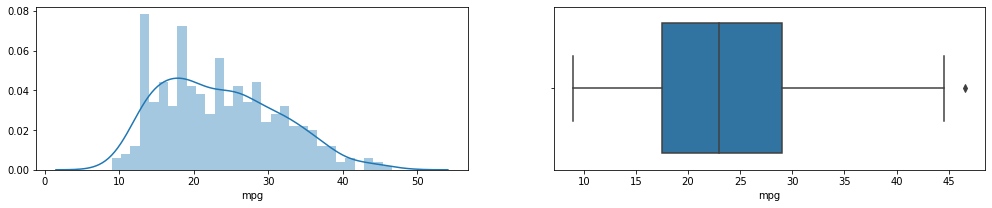

In [16]:
#Univariate analysis 'mpg'
f=plt.figure(figsize=(17,3))
f.add_subplot(1,2,1)
sns.distplot(df['mpg'],bins=30)
f.add_subplot(1,2,2)
sns.boxplot(df['mpg'])
print('Skewness of %s = %0.2f' %('mpg', df['mpg'].skew()))

Let's take a closer look at the car_name and try to extract data from the string.

In [17]:
# Checking for duplicates in 'car_name'
df.duplicated(subset=['car_name']).any() 

True

In [18]:
df[df.duplicated(['car_name', 'model_year'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
342,30.0,4,135.0,84,2385,12.9,81,1,plymouth reliant


In [19]:
df[(df['car_name']=='ford pinto') & (df['model_year']==75)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
168,23.0,4,140.0,83,2639,17.0,75,1,ford pinto
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto


In [20]:
df[(df['car_name']=='plymouth reliant') & (df['model_year']==81)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
338,27.2,4,135.0,84,2490,15.7,81,1,plymouth reliant
342,30.0,4,135.0,84,2385,12.9,81,1,plymouth reliant


Seems like it isn't duplicate values

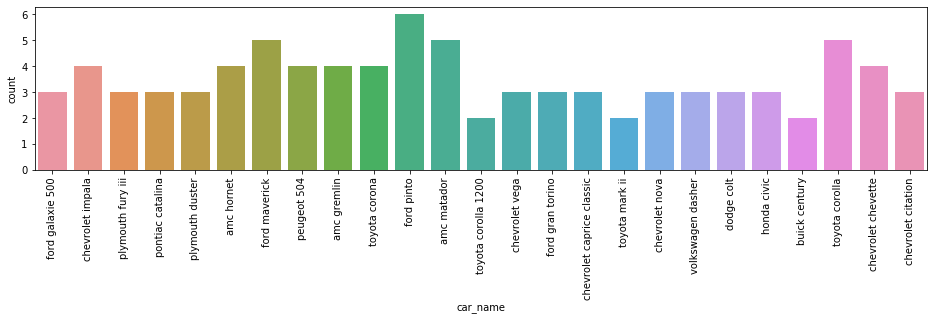

In [21]:
# Data Visualization for car_name values that occur more than twice
nm = (df['car_name'].value_counts()>2).head(25).index.tolist()

cars=df[df.car_name.isin(nm)]

plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
sns.countplot(cars['car_name'])

In [22]:
car_data = df['car_name'].str.split(' ', expand = True)
car_data

,0,1,2,3,4,5
0,chevrolet,chevelle,malibu,None,None,None
1,buick,skylark,320,None,None,None
2,plymouth,satellite,None,None,None,None
3,amc,rebel,sst,None,None,None
4,ford,torino,None,None,None,None
...,...,...,...,...,...,...
393,ford,mustang,gl,None,None,None
394,vw,pickup,None,None,None,None
395,dodge,rampage,None,None,None,None
396,ford,ranger,None,None,None,None


In [23]:
car_data[3].unique()

array([None, '(sw)', 'ii', 'sedan', 'royale', 'brougham', 'custom',
       'coupe', 's', 'classic', 'v8', 'deluxe', 'lj', 'landau', '2+2',
       'diesel', 'liftback', '6', '@', '(diesel)', 'gl', 'hatchback', 'l'],
      dtype=object)

In [24]:
# car_data[4].unique()
print(car_data[car_data[4]=='(sw)'])
car_data[3][82]=car_data[4][82]
print(car_data[car_data[4]=='(sw)'])

          0       1     2   3     4     5
82  toyouta  corona  mark  ii  (sw)  None
          0       1     2     3     4     5
82  toyouta  corona  mark  (sw)  (sw)  None


In [25]:
# car_data[5].unique()
print(car_data[car_data[5]=='(sw)'])
car_data[3][292]=car_data[5][292]
print(car_data[car_data[5]=='(sw)'])

            0        1     2  3        4     5
292  chrysler  lebaron  town  @  country  (sw)
            0        1     2     3        4     5
292  chrysler  lebaron  town  (sw)  country  (sw)


In [26]:
car_data.fillna('0', axis=1, inplace=True)
for i in car_data.columns:
    lst=car_data[i].unique()
    lst.sort()
    print('Column %s ==>' %i)
    print(lst)

Column 0 ==>
['amc' 'audi' 'bmw' 'buick' 'cadillac' 'capri' 'chevroelt' 'chevrolet'
 'chevy' 'chrysler' 'datsun' 'dodge' 'fiat' 'ford' 'hi' 'honda' 'maxda'
 'mazda' 'mercedes' 'mercedes-benz' 'mercury' 'nissan' 'oldsmobile' 'opel'
 'peugeot' 'plymouth' 'pontiac' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'triumph' 'vokswagen' 'volkswagen' 'volvo' 'vw']
Column 1 ==>
["'cuda" '0' '100' '100ls' '1131' '12' '1200' '1200d' '124' '124b' '128'
 '12tl' '131' '144ea' '145e' '18i' '1900' '200-sx' '2002' '200sx' '210'
 '240d' '244dl' '245' '264gl' '280-zx' '280s' '304' '310' '320i' '4000'
 '411' '5' '5000' '5000s' '504' '505s' '510' '604sl' '610' '626' '710'
 '810' '99e' '99gle' '99le' 'accord' 'ambassador' 'aries' 'arrow' 'aspen'
 'astro' 'b-210' 'b210' 'bel' 'benz' 'c10' 'c20' 'camaro' 'capri'
 'caprice' 'carina' 'catalina' 'cavalier' 'celica' 'century' 'challenger'
 'champ' 'charger' 'chevelle' 'chevette' 'citation' 'civic' 'colt'
 'concord' 'concours' 'cordoba' 'corolla' 'corona' 'coronet'

Columns 4 & 5 do not contribute to the dataset. Let's drop them.

In [27]:
car_data.drop(columns=[4,5], inplace=True)

Let's start replacing values and in car_name with requred values.

In [28]:
lst=car_data[0].unique()
lst.sort()
lst

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype=object)

In [29]:
df[(car_data[0]=='chevroelt') | (car_data[0]=='chevrolet') | (car_data[0]=='chevy')].shape[0]

47

In [30]:
df[(car_data[0]=='mercedes-benz') | (car_data[0]=='mercedes')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
211,16.5,6,168.0,120,3820,16.7,76,2,mercedes-benz 280s
297,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
328,30.0,4,146.0,67,3250,21.8,80,2,mercedes-benz 240d


In [31]:
df[car_data[0]=='vw']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
197,29.0,4,90.0,70,1937,14.2,76,2,vw rabbit
293,31.9,4,89.0,71,1925,14.0,79,2,vw rabbit custom
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


After analysis, car_model names to be renamed as follows:
1. maxda > mazda
2. chevroelt, chevy > chevrolet
3. mercedes > mercedes-benz
4. toyouta > toyota
5. vokswagen, vw > volkswagen

In [32]:
dt={'maxda':'mazda',
    'chevroelt':'chevrolet',
    'chevy':'chevrolet',
    'mercedes':'mercedes-benz',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
   }

In [33]:
car_d=car_data.copy()
car_d.head(2)

,0,1,2,3
0,chevrolet,chevelle,malibu,0
1,buick,skylark,320,0


In [34]:
df[car_data[0].isin(dt.keys())].shape

(15, 9)

In [35]:
car_data[0].replace(to_replace=dt.keys(), value=dt.values(), inplace=True)
df[car_data[0].isin(dt.values())].shape

(110, 9)

We are done with car_models. Let's see sub_category.

In [36]:
car_data[0].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes-benz', 'cadillac', 'triumph', 'nissan'],
      dtype=object)

In [37]:
# Identifying duplicates in car_data[1] and car_data[2] for each car_model (car_data[0])
for i in car_data[0].unique():
    a=list(car_data[(car_data[0]==i)][1].unique())
    b=list(car_data[(car_data[0]==i) & (car_data[2]!='0')][2].unique())
    c=set(a).intersection(b)
    if len(c)>0:
        print('%s ----> %s' %(i,c))
    else: continue

chevrolet ----> {'malibu', 'concours'}
plymouth ----> {'fury', 'custom'}
ford ----> {'futura', 'torino'}
toyota ----> {'tercel', 'mark'}
mercury ----> {'marquis'}


In [38]:
# Use this for individual analysis
car_data[(car_data[0]=='mercury') & (car_data[1]=='marquis') | (car_data[2]=='marquis')]

,0,1,2,3
67,mercury,marquis,0,0
90,mercury,marquis,brougham,0
287,mercury,grand,marquis,0


In [39]:
car_data.drop(columns=[2,3], axis=1, inplace=True)

In [40]:
data=pd.concat([df,car_data], axis=1)
data.drop(columns='car_name', axis=1, inplace=True)
data.shape

(398, 10)

In [41]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,0,1
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet,chevelle
1,15.0,8,350.0,165,3693,11.5,70,1,buick,skylark
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc,rebel
4,17.0,8,302.0,140,3449,10.5,70,1,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford,mustang
394,44.0,4,97.0,52,2130,24.6,82,2,volkswagen,pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford,ranger


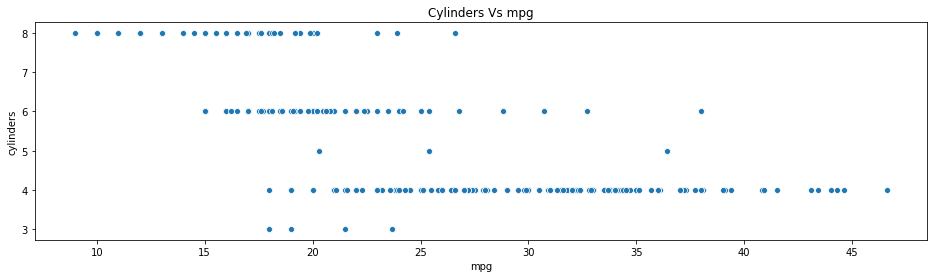

In [42]:
# Bivariate analysis
plt.figure(figsize=(16,4))
plt.title('Cylinders Vs mpg')
sns.scatterplot(x='mpg', y='cylinders', data=data)

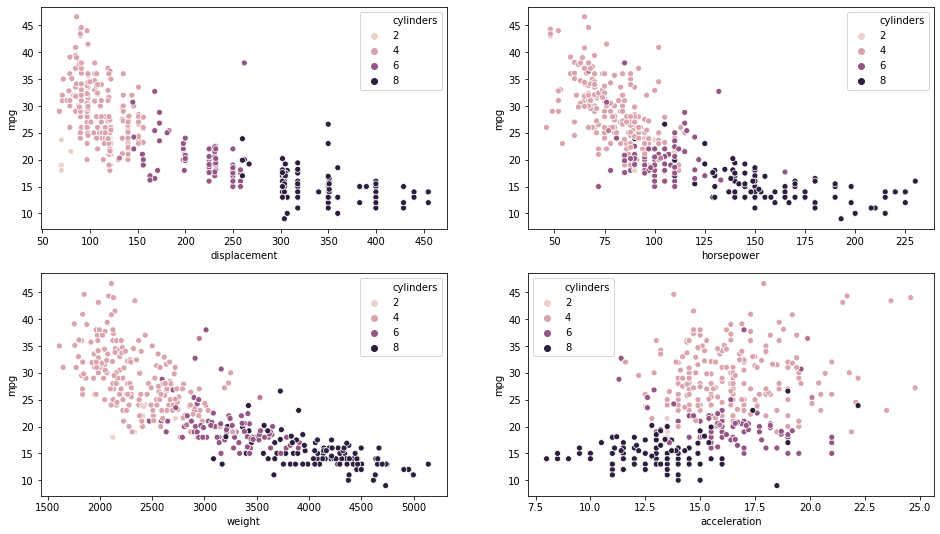

In [43]:
# Bivariate analysis
f=plt.figure(figsize=(16,9))
f.add_subplot(2,2,1)
sns.scatterplot(x='displacement', y='mpg', data=data, hue='cylinders')
f.add_subplot(2,2,2)
sns.scatterplot(x='horsepower', y='mpg', data=data, hue='cylinders')
f.add_subplot(2,2,3)
sns.scatterplot(x='weight', y='mpg', data=data, hue='cylinders')
f.add_subplot(2,2,4)
sns.scatterplot(x='acceleration', y='mpg', data=data, hue='cylinders')

Observations:
1. 'weight', 'horsepower', 'displacement' is highly correlated and as it increases, mpg decreases.
2. We only need to keep one of the highly correlated features.
3. Based on visual representation above, we will keep 'weight' and drop 'dsplacement' and 'horsepower' This is due to the evenly spread data in 'weight'.

In [44]:
data.drop(columns=['displacement', 'horsepower'], axis=1, inplace=True)

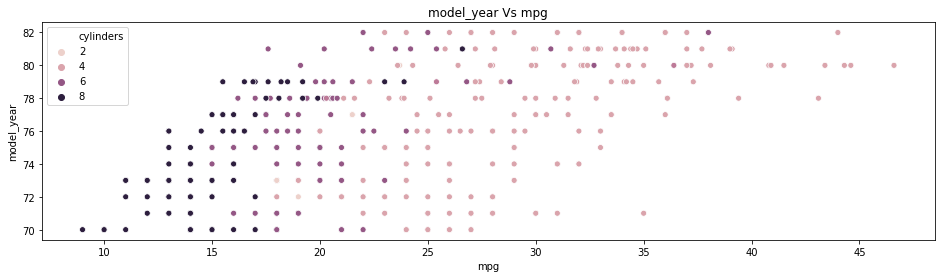

In [45]:
# Bivariate analysis
plt.figure(figsize=(16,4))
plt.title('model_year Vs mpg')
sns.scatterplot(x='mpg', y='model_year', data=data, hue='cylinders')

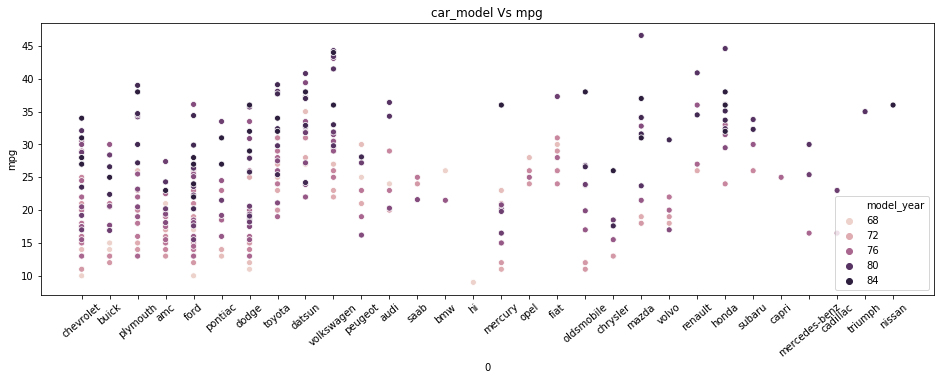

In [46]:
# Bivariate analysis
plt.figure(figsize=(16,5))
plt.title('car_model Vs mpg')
plt.xticks(rotation=40)
sns.scatterplot(x=0,y='mpg',data=data, hue='model_year')

In [47]:
# Removing Skewness
print('Before boxcox: Skewness of %s is %0.2f' %('weight', data['weight'].skew()))
data['weight']=boxcox(data['weight'],0)
print('After boxcox: Skewness of %s is %0.2f' %('weight', data['weight'].skew()))

Before boxcox: Skewness of weight is 0.53
After boxcox: Skewness of weight is 0.16


In [48]:
data=pd.get_dummies(data)
data.shape

(398, 226)

In [49]:
# Splitting x and y from data
x=data.drop(columns=['mpg'], axis=1)
y=data['mpg']

In [50]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

# Machine Learning Algorithms

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (318, 225) | x_test.shape --> (80, 225) 
y_train.shape --> (318,) | y_test.shape --> (80,)


In [52]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train,y_train)*100)
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train,y_train)*100))

In [53]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [54]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [55]:
score=[]
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score)

------------------- Linear Regression -------------------
Accuracy Score :: 86.32
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 68.29
------------------- Ridge Regression -------------------
Accuracy Score :: 93.04
------------------- Lasso Regression -------------------
Accuracy Score :: 80.70
------------------- Elastic Net -------------------
Accuracy Score :: 77.28
------------------- Support Vector Regression -------------------
Accuracy Score :: 44.91
------------------- Decision Tree Regression -------------------
Accuracy Score :: 100.00
------------------- Random Forest Regressor -------------------
Accuracy Score :: 97.88


As we can see, Decision Tree Regression provides a 100% accuracy score.

In [56]:
#Exporting model as pkl file
joblib.dump(dct,'dct_AutoMPG.pkl')

['dct_AutoMPG.pkl']